In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


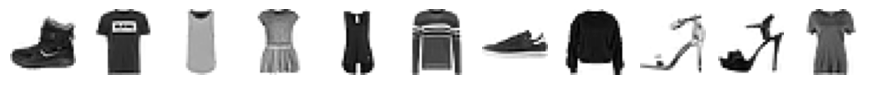

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')

plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts  = True))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0.8196000000000001


In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape=(784,))

In [ ]:
model = keras.Sequential(dense)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# 인공 신경망의 핵심은 손실함수다.

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4230 - accuracy: 0.8559
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4183 - accuracy: 0.8576
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4154 - accuracy: 0.8591
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4113 - accuracy: 0.8622
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4085 - accuracy: 0.8619
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4087 - accuracy: 0.8630
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4057 - accuracy: 0.8635
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4044 - accuracy: 0.8638
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4020 - accuracy: 0.8643
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.401

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4342 - accuracy: 0.8525


[0.4341544210910797, 0.8525000214576721]

In [ ]:
print(model.summary()) # 784개 픽셀 * 뉴런 10개 = 7840개 + y절편 10개 = 7580 <<< 모델 파라미터 수

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
